In [1]:
%matplotlib inline
%matplotlib notebook

In [2]:
import os 
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
PATH = os.path.abspath(os.path.join(os.path.dirname("."), "Data"))
FINAL_DATA = os.path.join(PATH, "Revisedfinaldataframecopy_wWeather (1).csv")

FINAL_DATA

'/Users/wrangamujadidi/Desktop/Capstone/capstone_opioid/Data/Revisedfinaldataframecopy_wWeather (1).csv'

In [6]:
data = pd.read_csv(FINAL_DATA)

In [7]:
data.head()

,HexagonNumber,HexandMonth,Month,Under20,20to29,30to39,40to49,50to59,60to69,70andabove,...,MiscCals,OverdoseCalls,PropertyCalls,QOLCalls,TrafficCalls,ViolentCalls,AverageTemperature,AverageHumidity,AveragePrecipitation,Unemployment
0,1,1-1,1,0,0,0,0,0,0,0,...,0,0,0,5,5,0,37.4075,0.541429,0.00025,0.274
1,1,1-2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,37.4075,0.541429,0.00025,0.274
2,1,1-3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,37.4075,0.541429,0.00025,0.274
3,1,1-4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,37.4075,0.541429,0.00025,0.274
4,1,1-5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,37.4075,0.541429,0.00025,0.274


In [8]:
#Drop the columns for HexandMonth and TotalNarcan.  HEXandMonth is not needed and TotalNarcan may cause bias because
#the Narcan Administered already accounts for the TotalNarcan for the month. 

data = data.drop(['HexandMonth'], axis=1)
data = data.drop(['TotalNarcan'], axis=1)


In [9]:
data.columns

Index(['HexagonNumber', 'Month', 'Under20', '20to29', '30to39', '40to49',
       '50to59', '60to69', '70andabove', 'NarcanAdministered', 'Male',
       'Female', 'MPDCalls', 'FEMSCalls', 'MedicalCalls', 'MiscCals',
       'OverdoseCalls', 'PropertyCalls', 'QOLCalls', 'TrafficCalls',
       'ViolentCalls', 'AverageTemperature', 'AverageHumidity',
       'AveragePrecipitation', 'Unemployment'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split as tts 

features = data [[
    'HexagonNumber', 'Month', 'Under20', '20to29', '30to39', '40to49',
       '50to59', '60to69', '70andabove', 'Male',
       'Female', 'MPDCalls', 'FEMSCalls', 'MedicalCalls', 'MiscCals',
       'OverdoseCalls', 'PropertyCalls', 'QOLCalls', 'TrafficCalls',
       'ViolentCalls','AverageTemperature','AverageHumidity','AveragePrecipitation','Unemployment'
]]

X = features

y = data['NarcanAdministered']

print(X.shape)
print(y.shape)

(9372, 24)
(9372,)


In [11]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.5)

In [20]:
from sklearn.metrics import classification_report

In [21]:
# Import the model form 
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier() 
model.fit(X_test, y_test)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1557
          1       1.00      1.00      1.00       318

avg / total       1.00      1.00      1.00      1875



In [22]:
model = DecisionTreeClassifier(max_depth=5) 
model.fit(X_test, y_test)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1557
          1       1.00      1.00      1.00       318

avg / total       1.00      1.00      1.00      1875



In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# We'll select 50 trees and opt for 'out-of-bag' samples to estimate the generalization error.
rf = RandomForestClassifier(n_estimators=50, oob_score=True)

In [25]:
# Next split up the data with the 'train test split' method in the Cross Validation module
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)

# ...and then run the 'fit' method to build a forest of trees
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [26]:
rf.score(X_test, y_test)

1.0

In [28]:
expected   = y_test
predicted  = rf.predict(X_test)

print(classification_report)

<function classification_report at 0x114352158>


# SVC

In [29]:
from sklearn.svm import SVC

model = SVC() 
model.fit(X_test, y_test)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1580
          1       1.00      0.91      0.95       295

avg / total       0.99      0.99      0.98      1875



In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

#print(list(zip(installation_features, model.feature_importances_.tolist())))

print("DecisionTreeRegressor")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

DecisionTreeRegressor
Mean squared error = 0.001
R2 score = 0.996


<IPython.core.display.Javascript object>


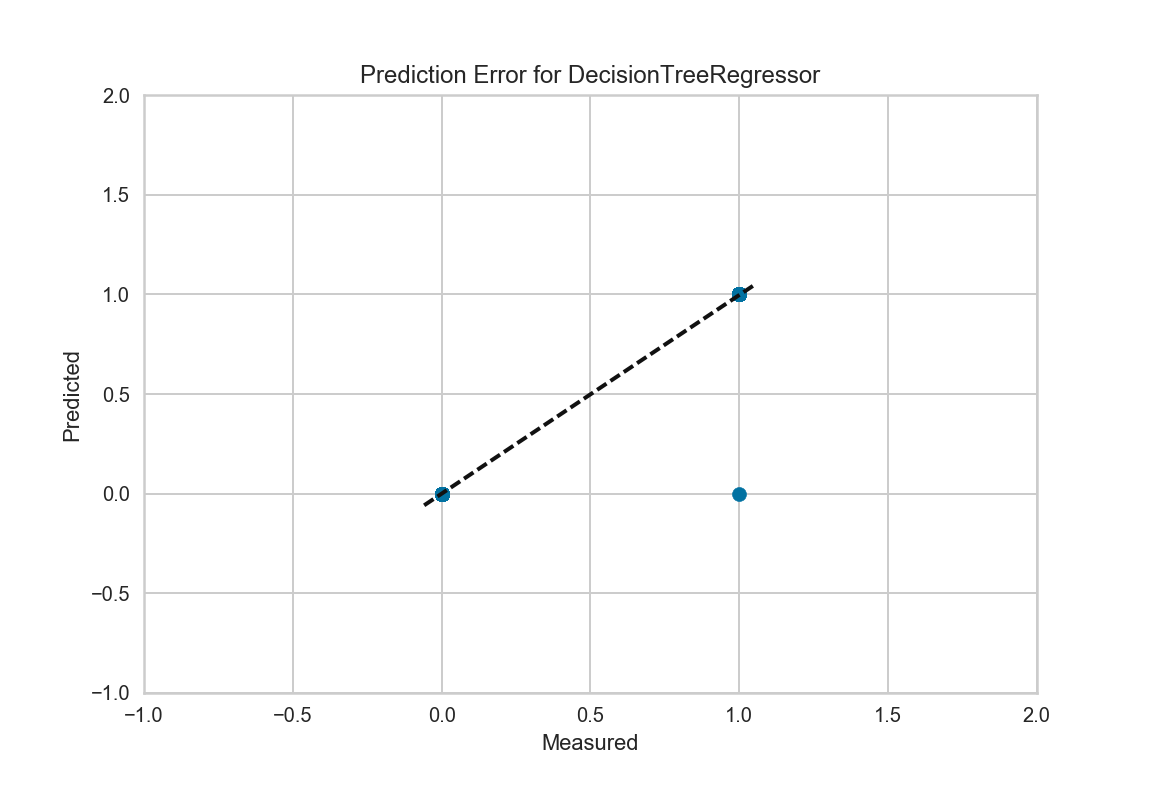

/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [31]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(DecisionTreeRegressor())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [32]:
from pandas.tools.plotting import scatter_matrix
# A visualization of the correlation between features

scatter_matrix(FINAL_DATA, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

AttributeError: 'str' object has no attribute '_get_numeric_data'